In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/home/user/Internshala/heart.csv")

In [3]:
data.tail(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [8]:
data["target"].unique()

array([1, 0])

In [9]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


1    165
0    138
Name: target, dtype: int64

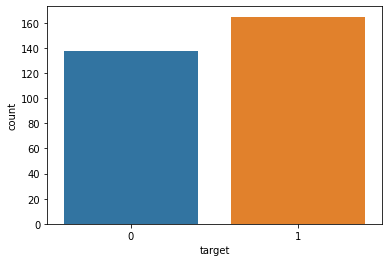

In [10]:
y = data["target"]
sns.countplot(y)
data.target.value_counts()
# 165 out of 303 have heart problems

In [11]:
print("Percentage of patience without heart problems: "+str(round(138*100/303,3)))
print("Percentage of patience with heart problems: "+str(round(165*100/303,3)))

Percentage of patience without heart problems: 45.545
Percentage of patience with heart problems: 54.455


<AxesSubplot:xlabel='sex', ylabel='target'>

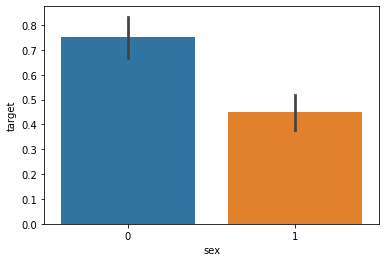

In [12]:
sns.barplot(data["sex"],y)

##### According to the given data women tend to have more heart issues than men.

<AxesSubplot:xlabel='cp', ylabel='target'>

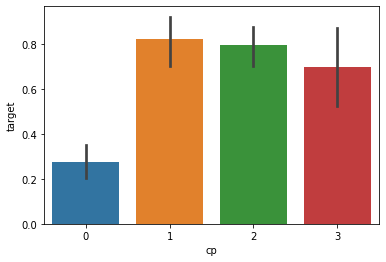

In [13]:
"""Chest pain vs target variable"""
sns.barplot(data["cp"],y)

##### Clearly ,the ones with typical angina are much less likely to have heart problems.

<AxesSubplot:xlabel='fbs', ylabel='target'>

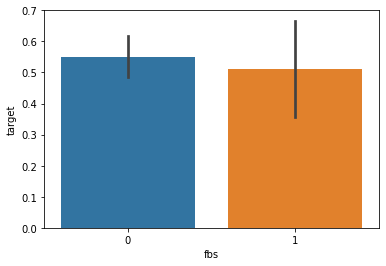

In [14]:
sns.barplot(data["fbs"],y)

<AxesSubplot:xlabel='restecg', ylabel='target'>

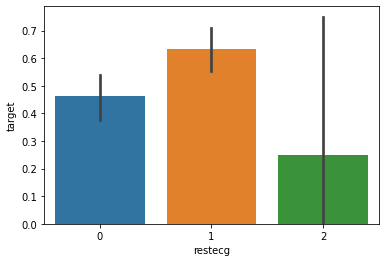

In [15]:
sns.barplot(data["restecg"],y)

##### People with restecg '1' and '0' are much more likely to have heart issues than with restecg '2'

<AxesSubplot:xlabel='exang', ylabel='target'>

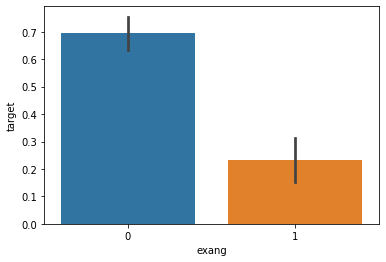

In [16]:
sns.barplot(data["exang"],y)

##### People with exercise induced angina are much less likely to have heart problems

<AxesSubplot:xlabel='slope', ylabel='target'>

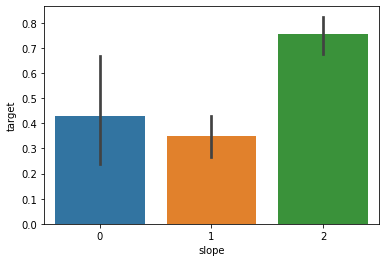

In [17]:
sns.barplot(data["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

<AxesSubplot:xlabel='ca', ylabel='target'>

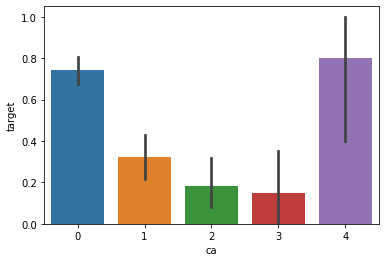

In [18]:
sns.barplot(data["ca"],y)

##### ca=4 and ca=0 have astonishingly large number of heart patients

<AxesSubplot:xlabel='thal', ylabel='target'>

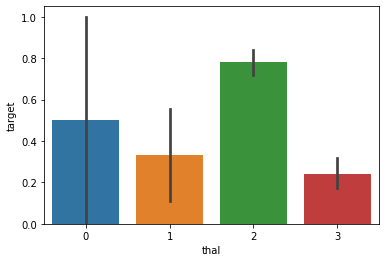

In [19]:
sns.barplot(data["thal"],y)

##### People  with thal= 2 has a higher rate of heart issues

In [20]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

# Splitting the data into training and testing...
S_train,S_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [21]:
S_train.shape

(242, 13)

In [22]:
Y_train.shape

(242,)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(S_train,Y_train)

Y_pred_lr = lr.predict(S_test)

In [25]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(S_train,Y_train)

Y_pred_nb = nb.predict(S_test)

In [27]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [28]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(S_train, Y_train)

Y_pred_svm = sv.predict(S_test)

In [29]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")

The accuracy score achieved using SVM is: 81.97 %


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(S_train,Y_train)
Y_pred_knn=knn.predict(S_test)

In [31]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(S_train,Y_train)
Y_pred_dt = dt.predict(S_test)

In [33]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.69 %


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(S_train,Y_train)
Y_pred_rf = rf.predict(S_test)


In [35]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bg = BaggingClassifier()
bg.fit(S_train, Y_train)
Y_pred_bg = bg.predict(S_test)

In [37]:
score_bg = round(accuracy_score(Y_pred_bg,Y_test)*100,2)

print("The accuracy score achieved using Bagging is: "+str(score_bg)+" %")

The accuracy score achieved using Bagging is: 86.89 %


In [38]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(S_train, Y_train)
Y_pred_ab = ab.predict(S_test)

In [39]:
score_ab = round(accuracy_score(Y_pred_ab,Y_test)*100,2)

print("The accuracy score achieved using AdaBoostClassifier is: "+str(score_ab)+" %")

The accuracy score achieved using AdaBoostClassifier is: 90.16 %


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gb.fit(S_train, Y_train)
Y_pred_gb = gb.predict(S_test)

In [41]:
score_gb = round(accuracy_score(Y_pred_gb,Y_test)*100,2)

print("The accuracy score achieved GradientBoostingClassfier is: "+str(score_gb)+" %")

The accuracy score achieved GradientBoostingClassfier is: 83.61 %


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [43]:
def build_model_1():
    model = Sequential()
    model.add(Dense(11,activation='swish',input_dim=13))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [44]:
S_Net_1 = build_model_1()

In [45]:
S_Net_1.fit(S_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 2s 6ms/step - loss: 41.4685 - accuracy: 0.5413
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 33.3936 - accuracy: 0.5413
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 25.1365 - accuracy: 0.5413
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 16.6340 - accuracy: 0.5413
Epoch 5/300
8/8 [==============================] - 0s 8ms/step - loss: 8.5990 - accuracy: 0.5372
Epoch 6/300
8/8 [==============================] - 0s 11ms/step - loss: 4.6673 - accuracy: 0.4669
Epoch 7/300
8/8 [==============================] - 0s 9ms/step - loss: 4.9027 - accuracy: 0.4587
Epoch 8/300
8/8 [==============================] - 0s 6ms/step - loss: 4.2344 - accuracy: 0.4669
Epoch 9/300
8/8 [==============================] - 0s 6ms/step - loss: 3.8449 - accuracy: 0.5041
Epoch 10/300
8/8 [==============================] - 0s 6ms/step - loss: 3.5533 - accuracy: 0.5124
Epoch 11/300
8/8 [======

8/8 [==============================] - 0s 11ms/step - loss: 0.3940 - accuracy: 0.8471
Epoch 85/300
8/8 [==============================] - 0s 11ms/step - loss: 0.3946 - accuracy: 0.8264
Epoch 86/300
8/8 [==============================] - 0s 7ms/step - loss: 0.3875 - accuracy: 0.8595
Epoch 87/300
8/8 [==============================] - 0s 8ms/step - loss: 0.4246 - accuracy: 0.8058
Epoch 88/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4265 - accuracy: 0.8140
Epoch 89/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4013 - accuracy: 0.8264
Epoch 90/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8182
Epoch 91/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3904 - accuracy: 0.8182
Epoch 92/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4027 - accuracy: 0.8182
Epoch 93/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4004 - accuracy: 0.8140
Epoch 94/300
8/8 [=============

Epoch 167/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3791 - accuracy: 0.8140
Epoch 168/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3885 - accuracy: 0.8223
Epoch 169/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8430
Epoch 170/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8347
Epoch 171/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3591 - accuracy: 0.8471
Epoch 172/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8388
Epoch 173/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8182
Epoch 174/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8347
Epoch 175/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8140
Epoch 176/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4145 - accuracy: 0.8099
Epoch 177/

8/8 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8678
Epoch 250/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3566 - accuracy: 0.8512
Epoch 251/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8306
Epoch 252/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8595
Epoch 253/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3592 - accuracy: 0.8719
Epoch 254/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3583 - accuracy: 0.8306
Epoch 255/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3613 - accuracy: 0.8512
Epoch 256/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.8595
Epoch 257/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3824 - accuracy: 0.8264
Epoch 258/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3651 - accuracy: 0.8264
Epoch 259/300
8/8 [=====

In [46]:
Y_pred_nn = S_Net_1.predict(S_test)

2/2 [==============================] - 0s 10ms/step


In [47]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [48]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 81.97 %


In [66]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_bg,score_ab,score_gb,score_nn]
algorithms = ["LR","NB","SVM","KNN","DT","RF","Bg","AB Cl","GB Cl","N Net"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using LR is: 85.25 %
The accuracy score achieved using NB is: 85.25 %
The accuracy score achieved using SVM is: 81.97 %
The accuracy score achieved using KNN is: 67.21 %
The accuracy score achieved using DT is: 78.69 %
The accuracy score achieved using RF is: 88.52 %
The accuracy score achieved using Bg is: 86.89 %
The accuracy score achieved using AB Cl is: 90.16 %
The accuracy score achieved using GB Cl is: 83.61 %
The accuracy score achieved using N Net is: 81.97 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

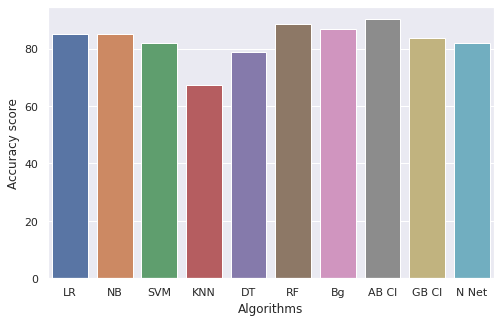

In [67]:
sns.set(rc={'figure.figsize':(8,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)